# DTSA 5509: Supervised Learning of Olympic Athletes
## Introduction to Machine Learning Supervised Learning

## Topic

The following project is about the analysis of Olympic athletes when it comes to age, height, weight, medals won, and the year participated in. The data is first cleaned and reviewed for Exploratory Data Analysis or EDA. After visually inspecting the data and checking the resulting values, the fact on whether a subgroup is necessary will be chosen due to the smoothness of data within this data frame. In the next step, multiple models which are used such as the Linear Regression, Ridge, Lasso, and Random Forest Regressor to see if there is a correlation between the age, height, and weight for medals won. The goal is to determine whether or not these physical attributes have a contribution when it comes to winning a medal. After, a linear regression is applied to see if there have been changes over the years for these features since the Olympic's inception. The reason this information is valuable is because coaches and athletes might want to know if there is a certain advantage when it comes to these features and whether to pursue a particular sport. Weight is also a feature that can be slightly modified and unveiled correlations can be incredibly useful for Olympic participants.

## Data Information

#### Summary

The following paper will analyze a public dataset from Kaggle which holds information about all athletes that have attended from 1896 up until 2016. [1] For those that are from the US, the data is in metric units and the height is represented in centimeters and the weight is in kilograms. [1] The data provided from the site was labeled, "120 years of Olympic history: athletes and results" and is stored in a CSV file called "athlete_events". [1] The citation for the data provided can be found at the end of this report under the APA Citations.

#### Import Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

#### Hide Warnings

Hide unneccessary warnings before running rest of code.

In [2]:
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

#### Read Files from CSV

In [3]:
df_csv = pd.read_csv('./athlete_events.csv')

# Save to Separate Data Frame
df = df_csv

FileNotFoundError: [Errno 2] No such file or directory: './athlete_events.csv'

#### Space and Size

The space and size for the data frame is shown below. Output is the memory, column size, and row size.

In [4]:
# Function for Checking Memory and Size
def MemCheck(df):
    # Get Data Frame Space
    df_mem = df.memory_usage().sum()
    print("Memory:", df_mem, "bytes")

    # Get Row and Column Count
    num_row, num_col = df.shape
    print("Rows:", num_row)
    print("Columns:", num_col)
    
MemCheck(df_csv)

Memory: 32534048 bytes
Rows: 271116
Columns: 15


#### Evaluate the data types and column names. 

The columns are shown below with the associate data types between the chevrons or the “<” and “>” symbols. There are objects or also called strings, integers (int), and floats.

In [5]:
# Get Data Types
for col in df.columns:
    print("'" + col + "': " + str(type(df[col].dtype)))

'ID': <class 'numpy.dtype[int64]'>
'Name': <class 'numpy.dtype[object_]'>
'Sex': <class 'numpy.dtype[object_]'>
'Age': <class 'numpy.dtype[float64]'>
'Height': <class 'numpy.dtype[float64]'>
'Weight': <class 'numpy.dtype[float64]'>
'Team': <class 'numpy.dtype[object_]'>
'NOC': <class 'numpy.dtype[object_]'>
'Games': <class 'numpy.dtype[object_]'>
'Year': <class 'numpy.dtype[int64]'>
'Season': <class 'numpy.dtype[object_]'>
'City': <class 'numpy.dtype[object_]'>
'Sport': <class 'numpy.dtype[object_]'>
'Event': <class 'numpy.dtype[object_]'>
'Medal': <class 'numpy.dtype[object_]'>


In [6]:
# Review
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Data Preprocessing and Cleaning

#### Removal of Features
For this analysis, all features other than 'Age', 'Height', 'Weight', 'Year', 'Event', 'Medal' will be removed. Other columns do not add any used information to the data frame and will be potentially inconvenient during analysis.

In [7]:
df = df[['Age', 'Height', 'Weight', 'Year', 'Event', 'Medal']]

#### Replace Column Values

Those that entered the Olympics, but did not receive a medal are given a NA value for their 'Medal" column. Thus, this needs to be rectified by replacing the values with a 'None' string. 

In [76]:
# Fill in Empty Medal Values with 'None'
df.loc[df['Medal'].isna(), 'Medal'] = 'None'

#### Removal of Rows with NA Values

The other columns except for 'Event' should be filled with a '0' value since the information from the rest of the row can be used for regression purposes. Since the 'Event' can't be imputed or infered, these rows will be dropped if there are NAs values for this column.

In [78]:
# Fill in NA Values with Zero
for col in ['Age', 'Height', 'Weight', 'Year']: 
    df.loc[df[col].isna(), col] = 0

Check that the data table has had these changes applied.

In [79]:
# Check for missing values in each column
col_na = df.isna().any()
print(col_na)

Age       False
Height    False
Weight    False
Year      False
Event     False
Medal     False
dtype: bool


In [75]:
df[df['Medal'] == 'None'].head(10)

,Age,Height,Weight,Year,Event,Medal
0,24.0,180.0,80.0,1992,Basketball Men's Basketball,None
1,23.0,170.0,60.0,2012,Judo Men's Extra-Lightweight,None
2,24.0,0.0,0.0,1920,Football Men's Football,None
4,21.0,185.0,82.0,1988,Speed Skating Women's 500 metres,None
5,21.0,185.0,82.0,1988,"Speed Skating Women's 1,000 metres",None
6,25.0,185.0,82.0,1992,Speed Skating Women's 500 metres,None
7,25.0,185.0,82.0,1992,"Speed Skating Women's 1,000 metres",None
8,27.0,185.0,82.0,1994,Speed Skating Women's 500 metres,None
9,27.0,185.0,82.0,1994,"Speed Skating Women's 1,000 metres",None
10,31.0,188.0,75.0,1992,Cross Country Skiing Men's 10 kilometres,None


#### Data Post-Processing

Below is a snapshot of the new cleaned data.

In [81]:
df.head(5)

,Age,Height,Weight,Year,Event,Medal
0,24.0,180.0,80.0,1992,Basketball Men's Basketball,None
1,23.0,170.0,60.0,2012,Judo Men's Extra-Lightweight,None
2,24.0,0.0,0.0,1920,Football Men's Football,None
3,34.0,0.0,0.0,1900,Tug-Of-War Men's Tug-Of-War,Gold
4,21.0,185.0,82.0,1988,Speed Skating Women's 500 metres,None


#### About Duplicates
Since the data doesn't remove athletes who have competed multiple times in the Olympics and removed the 'Name' columns prior, there might be replicates of the same 'Height' and 'Weight'. However, these are left intentionally since the goal is to determine the best height and weight for an Olympian within an 'Event' to qualify for the desired medal regardless of repetition. 

#### Space and Size

The space and size for the data frame after preprocesesing is shown below.

In [82]:
MemCheck(df)

Memory: 14098032 bytes
Rows: 271116
Columns: 6


#### Discussions
The 'Age', 'Height', 'Weight', 'Year', and 'Medal' columns were modified to have respective values and rows were checked for NAs. Since the data came with data types already assigned to it, there wasn't a need to change this aspect of the data frame. Data munging also wasn't necessary since the CSV file was imported nicely into the data frame. Since a large portion of the data was already pretreated, either the Kaggle user was thorough with the data scraping or the process of obtaining an athelete's data is very precise at the source.

## Exploratory Data Analysis (EDA)
#### Purpose
Due to the sheer amount of size of the data, EDA was necessary. First, an analysis of the 'Age', 'Weight', and 'Height' were visually inspected through histograms and box plots. After, a correlation matrix was taken to see if there was any correlation between the features.

#### Histogram

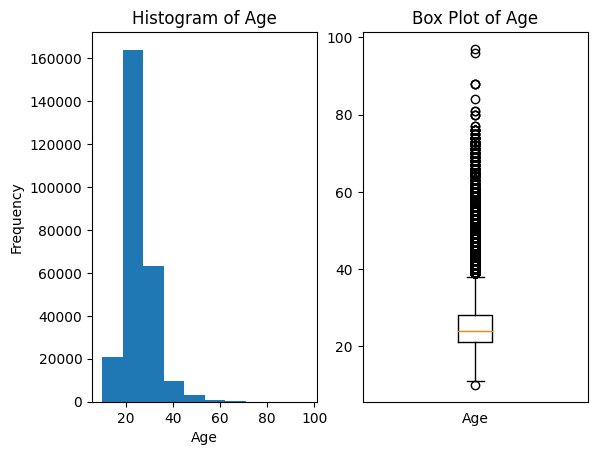

Histogram Values:
[  9474  32303 177744  41279   7738   1833    531    203      6      5]

Histogram Edges:
[ 0.   9.7 19.4 29.1 38.8 48.5 58.2 67.9 77.6 87.3 97. ]

Box Values: 
min    10.0
25%    21.0
50%    24.0
75%    28.0
max    97.0
Name: Age, dtype: float64


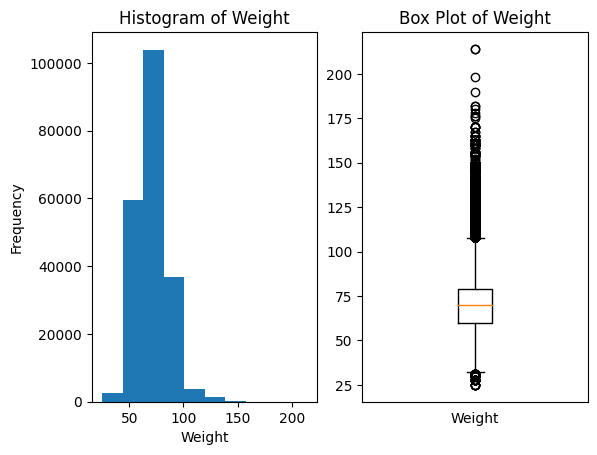

Histogram Values:
[ 62875   2018  71748 106234  24900   2696    557     77      8      3]

Histogram Edges:
[  0.   21.4  42.8  64.2  85.6 107.  128.4 149.8 171.2 192.6 214. ]

Box Values: 
min     25.0
25%     60.0
50%     70.0
75%     79.0
max    214.0
Name: Weight, dtype: float64


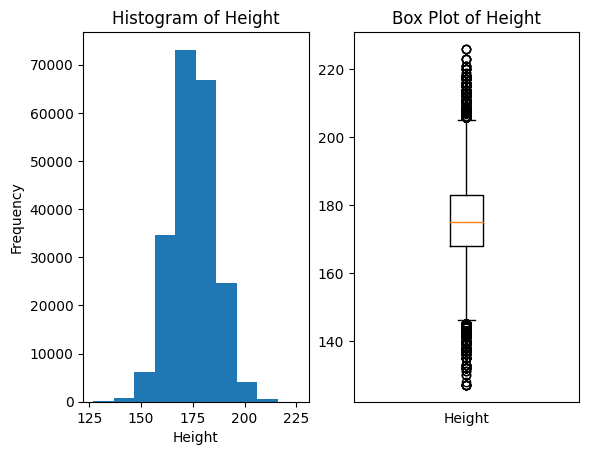

Histogram Values:
[ 60171      0      0      0      0     41  10835 136089  63009    971]

Histogram Edges:
[  0.   22.6  45.2  67.8  90.4 113.  135.6 158.2 180.8 203.4 226. ]

Box Values: 
min    127.0
25%    168.0
50%    175.0
75%    183.0
max    226.0
Name: Height, dtype: float64


In [83]:
# Function for Generating Histograms and Boxes
def histBox(dfIn):

    # Remove Data with 0's that Were Imputed Earlier
    df_hist = df_box = dfIn[dfIn[col] != 0]

    # Generate Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df_hist[col], bins=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Add to Subplot
    plt.subplot(1, 2, 2)

    # Generate Box Plot
    plt.boxplot(df_box[col])
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')

    # Remove Box Plot Axis Label
    plt.xticks([])

    # Show Figure
    plt.show()

    # Get the histogram values
    hist_val, hist_edg = np.histogram(df[col])
    print('Histogram Values:')
    print(hist_val)
    print()
    print('Histogram Edges:')
    print(hist_edg)
    print()

    # Print Values
    box_val = df_box.describe().loc[['min', '25%', '50%', '75%', 'max']]
    print('Box Values: ')
    print(box_val[col])

for col in ['Age', 'Weight', 'Height']:
    histBox(df)

#### Correlation Matrix

The correlation matrix is used to determine if there is any potential colinearity that might interfere with the model's output.

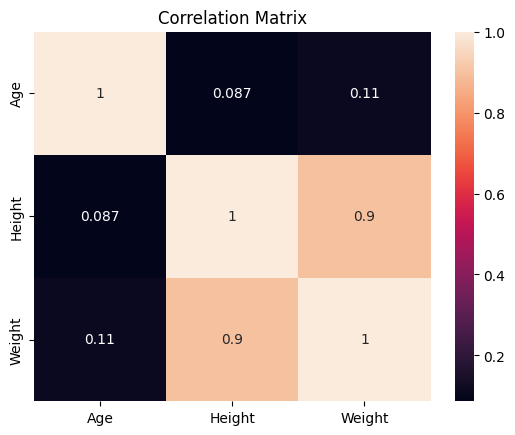

In [84]:
# Get Correlation Matrix
corr_mat = df[['Age', 'Height', 'Weight']].corr()
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Difficulties 

Due to the eccentricities of the sports, the box plots shows a significant spread when it came to outliers indicating that some sports might have preferences for certain body types. Since the sports varied widely from gymnastics to swimming to golf, the decision to pick a specific sport for analysis was done after the EDA.

#### Summary, Discussion, and Findings

Surprisingly, across all Olympians the strongest correlation was between height and weight. When it came to age, there was hardly a correlation between those other two features. The average height, weight, and age depicted in the histograms and box plots were as expected with figures hovering around 24 years old, 70 kilograms, and 175 centimeters. Surprisingly, the height had a stronger spread than the weight meaning that statistically, an athlete was more likely to be more similar in weight than height. 

#### Conclusions 

Due to the spread and variance for each of these values prior to analysis into how this would tie into winning a gold medal, an event was decided to be specifically chosen to reduce the influence of the different sports on each other. 

## Results

#### Feature Selection

Since there was such a large distribution of 'Height' and 'Weight', the 'Event' column was reviewed to see if narrowing this down would help with eliminating the subgroups within the EDA producted. The 'Event' column was examined by the amount of participants that were the column and the top 10 with the largest amount of participants were examined.

In [85]:
# Get Counts Per 'Event'
count = df['Event'].value_counts()

# Review Top 10 Highest Count
print(count.head(20))

Football Men's Football                   5733
Ice Hockey Men's Ice Hockey               4762
Hockey Men's Hockey                       3958
Water Polo Men's Water Polo               3358
Basketball Men's Basketball               3280
Cycling Men's Road Race, Individual       2947
Gymnastics Men's Individual All-Around    2500
Rowing Men's Coxed Eights                 2423
Gymnastics Men's Team All-Around          2411
Handball Men's Handball                   2264
Athletics Men's Marathon                  2093
Gymnastics Men's Parallel Bars            2049
Gymnastics Men's Horizontal Bar           2041
Gymnastics Men's Pommelled Horse          2031
Gymnastics Men's Rings                    2020
Athletics Men's 100 metres                1936
Athletics Men's 4 x 100 metres Relay      1910
Gymnastics Men's Floor Exercise           1880
Gymnastics Men's Horse Vault              1868
Volleyball Men's Volleyball               1861
Name: Event, dtype: int64


After examining the data, the following considerations were taken into account when selecting the event. First, "What event is least likely to have changed over the past 120 years?" to prevent an unwanted deviations and second, "What are individual sports?" to ensure that each individual was treated as an isolated contributor to the data set. Thus, the event chosen was "Athletics Men's Marathon". The length of the marathon has remained consistent since 1924, from when the mileage was changed from 26 miles to 26.2 miles [2], and there aren't any extra equiment that might have been modified by engineers throughout the decades. As for the mileage change, this is assumed not to significantly impact the final results.

#### Histogram

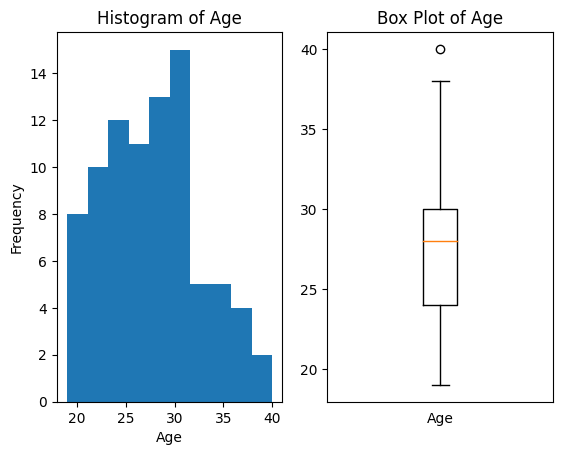

Histogram Values:
[  9474  32303 177744  41279   7738   1833    531    203      6      5]

Histogram Edges:
[ 0.   9.7 19.4 29.1 38.8 48.5 58.2 67.9 77.6 87.3 97. ]

Box Values: 
min    19.0
25%    24.0
50%    28.0
75%    30.0
max    40.0
Name: Age, dtype: float64


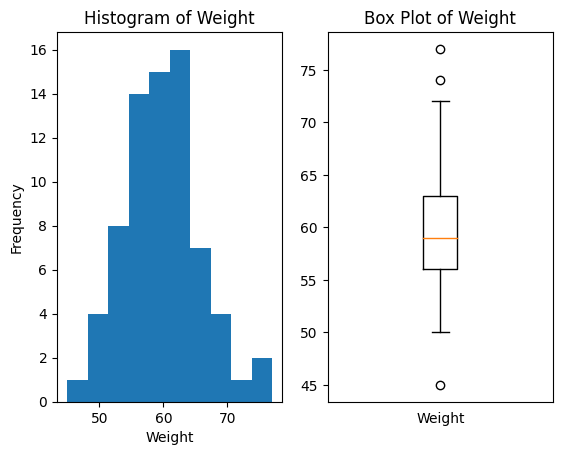

Histogram Values:
[ 62875   2018  71748 106234  24900   2696    557     77      8      3]

Histogram Edges:
[  0.   21.4  42.8  64.2  85.6 107.  128.4 149.8 171.2 192.6 214. ]

Box Values: 
min    45.0
25%    56.0
50%    59.0
75%    63.0
max    77.0
Name: Weight, dtype: float64


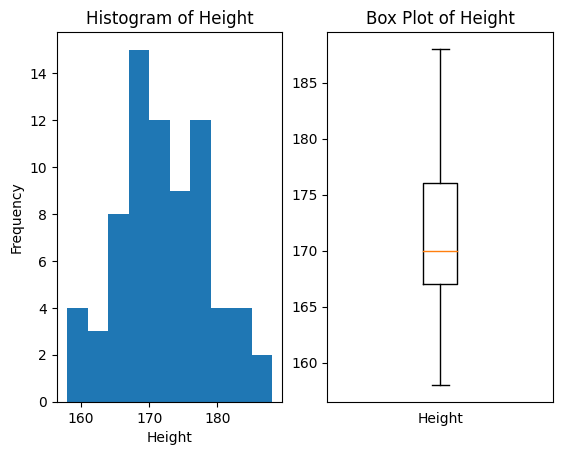

Histogram Values:
[ 60171      0      0      0      0     41  10835 136089  63009    971]

Histogram Edges:
[  0.   22.6  45.2  67.8  90.4 113.  135.6 158.2 180.8 203.4 226. ]

Box Values: 
min    158.0
25%    167.0
50%    170.0
75%    176.0
max    188.0
Name: Height, dtype: float64


In [86]:
# Assign Event
df_med = df[df['Event'] == "Athletics Men's Marathon"]

# Obtain histograms and Box Plots
for col in ['Age', 'Weight', 'Height']:
    histBox(df_narr)

#### Notes

Compared to the previous data frame, the one that only observes marathon runners has a changed average when it comes to height, weight, and age. Instead of the average participant being 24 years old, 70 kilograms, and 175 centimeters, the average runner is a bit older, lighter, and shorter being 28 years old, 59 kilograms, and 170 centimeters. A visual comparison shows that the amount of outliers within the data set are less in previously shown.

#### Multiple OLS Models with Cross Validation

Multi-linear OLS models such as the Linear Regression, Ridge, Lasso, and Random Forest Regressor were taken with cross validation to verify whether the models could be trusted below.

In [89]:
# Define OLS Function

def OLSFun(df, XIn, yIn):

    # Create Label Encoder
    label_encoder = LabelEncoder()

    # Encode the 'Medal' column
    df['Medal'] = label_encoder.fit_transform(df['Medal'])

    # Add Constant Column
    df['Constant'] = 1

    # Place into X and y OLS Variables
    X = df[XIn]
    y = df[yIn]

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Create  Instance
    model_comp = mod
    
    # Cross Validation
    scores = cross_val_score(model_comp, X, y, cv=5, scoring='r2')

    # Print Out Results
    print(model.summary())
    print()
    print('Cross-Validation Scores:', scores)
    print('Average R-squared:', scores.mean())
    print()

# Run Function
for mod in [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor()]:
    try:
        OLSFun(df_narr, ['Constant', 'Height', 'Weight', 'Age'], 'Medal')
    except:
        print("Unable to produce model:", mod)

                            OLS Regression Results                            
Dep. Variable:                  Medal   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.4794
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.698
Time:                        18:39:26   Log-Likelihood:                -86.662
No. Observations:                  73   AIC:                             181.3
Df Residuals:                      69   BIC:                             190.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -1.7715      2.599     -0.682      0.4

All of the models have negative average R squared values. This is showing that a model cannot be draw when it comes to evaluating the 'Age', 'Height', and 'Weight' to determine whether a marathon runner gets a gold medal from the Olympic contestents. The cross validation numbers also showed negative values for all of the models. The data has been preprocessed, so there is potentially some unforseeable issue affecting the results. The standard errors imply that there might be a high amount of covariance and thus colinearity needs to be checked again. 

#### Colinearity

Here the colinearity between 'Age', 'Height', and 'Weight' are reviewed again.

In [90]:
# Get Correlation Matrix
corr_mat = df_narr[['Age', 'Height', 'Weight']].corr()

# Print Correlation Matrix
print(f"Event: {col}")
print(corr_mat)
print()

Event: Height
             Age    Height    Weight
Age     1.000000  0.358058  0.333728
Height  0.358058  1.000000  0.945962
Weight  0.333728  0.945962  1.000000



It appears that there is a strong colinearity between 'Height' and 'Weight'. Compared to the previous data frame which included all athletes, the age factor plays a stronger role in being strongly linked to height and weight in this selected data.

#### Feature Engineering

To combat the covariance, the height and weight are combined into a 'BMI' column and the function is run again to see if there are different results.

In [91]:
# Feature Engineering
df_narr['BMI'] = df_narr['Weight'] / df_narr['Height']**2

# Run Function
for mod in [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor()]:
    try:
        OLSFun(df_narr, ['Constant', 'BMI', 'Age'], 'Medal')
    except:
        print("Unable to produce model:", mod)

                            OLS Regression Results                            
Dep. Variable:                  Medal   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.3587
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.700
Time:                        18:40:18   Log-Likelihood:                -87.043
No. Observations:                  73   AIC:                             180.1
Df Residuals:                      70   BIC:                             187.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       1.2305      0.976      1.260      0.2

For the R squared values, the scores did not improve much which suggests that more preprocessing or more evaluation of the data is needed. All values were negative and despite the Lasso value having the best R squared value, the model was still deemed inaccurate.

#### Linear Regression Fit

To see if there was a linear trend throughout the years since the Olympics within the event, the 'Age', 'Height', and 'Weight' for medal winners was plotted.

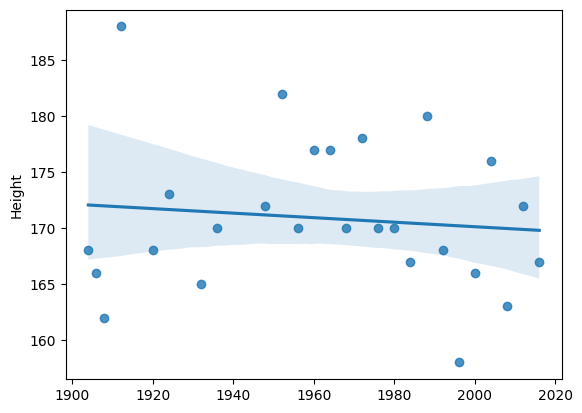

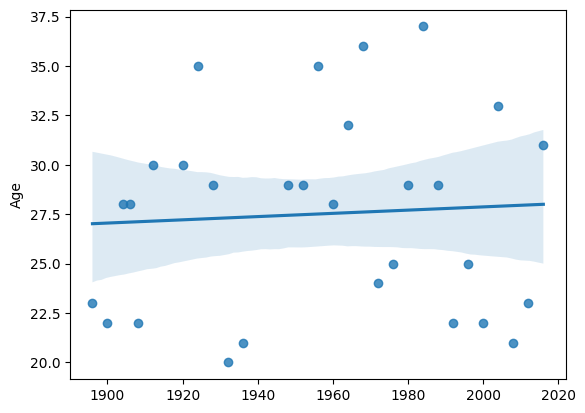

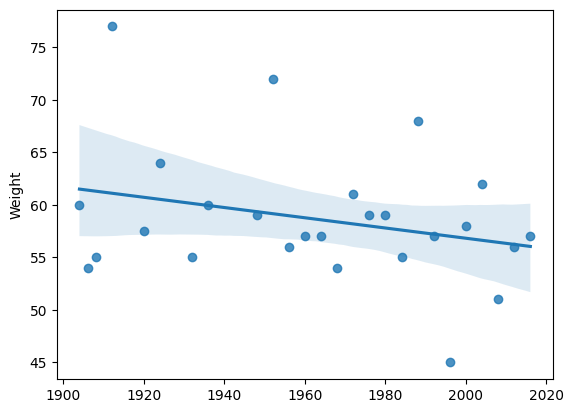

In [99]:
# Declare Function for Plots
def RegPlot(x, y, ylabel):
    sns.regplot(x=x, y=y)
    plt.ylabel(ylabel)
    plt.show()

# Declare Col String
col = 'Year'

# Aggregate By Date
df_gold = df_med[df_med['Medal'] == 'Gold']
df_agg = df_gold.groupby(col).mean().reset_index()

# Plot For Each Feature
feat = ['Height', 'Age', 'Weight']

RegPlot(df_agg[df_agg['Height'] != 0][col].values, df_agg[df_agg['Height'] != 0]['Height'].values, 'Height')
RegPlot(df_agg[df_agg['Age'] != 0][col].values, df_agg[df_agg['Age'] != 0]['Age'].values, 'Age')
RegPlot(df_agg[df_agg['Weight'] != 0][col].values, df_agg[df_agg['Weight'] != 0]['Weight'].values, 'Weight')

The data shows that surprisingly, the heigth, weight, and age for the winners tended not to fluctuate, save for some outliers. 

#### Summary

There is a larger variance when it comes to comparing the general Olympic athlete to that of a marathon runner when it comes to age, height, and weight. Olympic athletes are on average 24 years old, 70 kilograms, and 175 centimeters while the average marathon runner is 28 years old, 59 kilograms, and 170 centimeters. There was a high correlation between height and weight that interferred with the results of the model. Despite inputting the features for height, weight, and age while taking into account the year, there was no connection between those values and winning a medal. The Random Forest model was able to draw the best model, but had a R squared value of 0.01 which meant that the model wasn't accurate. Seeing that none of the models were able to draw a reasonable inference from the height, weight, and age categories either the data needs to be preprocessed more or other models looked into. 

For both the general and specific case, there was a correlation between height and weight that resulted in covariance problems that interfered with generating a model. 

#### Training to Improve Process

For future models, the subgroup for the marathon runners should be divided even further into decades to see if there are trends there. Historical facts about the sport's event should be reviewed too as well as other features.

#### Model Comparison

The Random Forest model compared to all the others was deemed the best fit due to the R squared value. However, the fit was also significantly low for a model in general and thus more data anlysis should be done prior to creating these models.

## Discussion and Conclusion

#### Lessons Learned

For this, the model was too large and varied when first evaluating and reviewing the EDA. This took a considerable amount of time not shown in the paper with multiple models being generated. First, a subgroup should be chosen to save on time. Once a reliable model has been established, expanding outwards is recommended.

#### Mistakes

Height and weight are strongly correlated to each other and should be combined with feature engineering. There are outliers due to the Olympics history that needs to be taken into account. When it comes to applying models to the Olympians, the data should be preprocessed more than what was shown in this paper.

#### Future Improvement Opportunities

For those that wish to continue, the recommendation is to chose multiple sports and compare these factors. Combine the height and weight column into a single one, keep other columns that might prove to be necessary, and narrow down a group to run analysis on.

## APA Citations
[1] Rgriffin. (2018, June 15). 120 years of Olympic history: Athletes and results. Kaggle. https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

[2] Marathon home. TimetoRun Marathon. (n.d.). https://www.time-to-run.com/marathon/articles/history#:~:text=For%20the%201908%20London%20Olympic%20games%20marathon%20the,first%20to%20hold%20the%20now%20official%20marathon%20distance. 